# Analysis from ENEM microdata for 2022

## Import libs

In [1]:
import pandas as pd
from apyori import apriori

## Read microdata file

In [2]:
data = pd.read_csv('../microdata/microdata-enem-2022.csv', sep=';', encoding='ISO-8859-1')
data

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210057943671,2022,14,M,2,2,1,1,2,1,...,B,A,A,A,A,A,A,A,A,A
1,210057516120,2022,14,M,2,1,1,1,16,1,...,E,E,B,E,B,B,E,B,E,B
2,210057280536,2022,5,F,1,2,1,1,2,1,...,A,A,A,A,A,A,C,A,A,B
3,210055724397,2022,6,M,1,3,1,1,2,1,...,B,A,A,C,A,A,C,B,B,B
4,210055097896,2022,4,M,0,3,1,1,1,1,...,A,A,A,A,A,A,B,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3476100,210056389903,2022,3,M,1,1,1,2,0,2,...,B,A,B,B,B,A,E,A,A,B
3476101,210057205644,2022,14,F,2,1,1,2,0,2,...,A,A,A,B,A,A,C,A,B,B
3476102,210056699189,2022,2,M,1,1,1,2,0,2,...,B,A,B,C,B,A,E,A,B,B
3476103,210056983033,2022,3,M,1,3,1,2,0,3,...,B,A,B,D,A,A,E,A,B,B


## Select only columns of interest

In [3]:
interest_columns = [
    'TP_SEXO',
    'TP_ESTADO_CIVIL',
    'TP_COR_RACA',
    'TP_FAIXA_ETARIA',
    'TP_ST_CONCLUSAO',
    'TP_ESCOLA',
    'TP_DEPENDENCIA_ADM_ESC',
    'SG_UF_PROVA',
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_MT',
    'NU_NOTA_REDACAO',
    'Q001',
    'Q002',
    'Q006',
    'Q022',
    'Q024',
    'Q025'
]

interest_data = data[interest_columns]

interest_data.head()

,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_FAIXA_ETARIA,TP_ST_CONCLUSAO,TP_ESCOLA,TP_DEPENDENCIA_ADM_ESC,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q006,Q022,Q024,Q025
0,M,2,2,14,1,1,NaN,DF,NaN,NaN,NaN,NaN,NaN,A,A,B,A,A,A
1,M,2,1,14,1,1,NaN,DF,NaN,NaN,NaN,NaN,NaN,D,D,Q,E,E,B
2,F,1,2,5,1,1,NaN,BA,421.1,546.0,498.8,565.3,760.0,E,F,B,C,A,B
3,M,1,3,6,1,1,NaN,ES,490.7,388.6,357.8,416.0,320.0,C,A,A,C,B,B
4,M,0,3,4,1,1,NaN,PA,NaN,NaN,NaN,NaN,NaN,D,B,B,B,A,A


### Check count for valid values

In [4]:
interest_data.count()

TP_SEXO                   3476105
TP_ESTADO_CIVIL           3476105
TP_COR_RACA               3476105
TP_FAIXA_ETARIA           3476105
TP_ST_CONCLUSAO           3476105
TP_ESCOLA                 3476105
TP_DEPENDENCIA_ADM_ESC     951944
SG_UF_PROVA               3476105
NU_NOTA_CN                2355395
NU_NOTA_CH                2493442
NU_NOTA_LC                2493442
NU_NOTA_MT                2355395
NU_NOTA_REDACAO           2493442
Q001                      3476105
Q002                      3476105
Q006                      3476105
Q022                      3476105
Q024                      3476105
Q025                      3476105
dtype: int64

## Translate some columns to better readability

In [5]:
%run '../scripts/attribute-dictionary.py'

interest_data = interest_data.fillna(value = {"TP_DEPENDENCIA_ADM_ESC": 0})
interest_data = interest_data.replace(dictionary_params)

interest_data.head()

,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_FAIXA_ETARIA,TP_ST_CONCLUSAO,TP_ESCOLA,TP_DEPENDENCIA_ADM_ESC,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q006,Q022,Q024,Q025
0,Masculino,Casado(a) ou mora com companheiro(a),Preto,Entre 41 e 45 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Centro-Oeste,NaN,NaN,NaN,NaN,NaN,Pai nunca estudou,Mãe nunca estudou,Classe Social E,Não tem celular,Não tem computador,Não tem internet em casa
1,Masculino,Casado(a) ou mora com companheiro(a),Branco,Entre 41 e 45 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Centro-Oeste,NaN,NaN,NaN,NaN,NaN,Pai Ensino médio incompleto,Mãe Ensino médio incompleto,Classe Social A,Tem celular,Tem computador,Tem internet em casa
2,Feminino,Solteiro(a),Preto,Entre 17 e 25 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Nordeste,421.1,546.0,498.8,565.3,760.0,Pai Ensino médio completo,Mãe Graduação completa,Classe Social E,Tem celular,Não tem computador,Tem internet em casa
3,Masculino,Solteiro(a),Pardo,Entre 17 e 25 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Sudeste,490.7,388.6,357.8,416.0,320.0,Pai Fundamental II incompleto,Mãe nunca estudou,Classe Social E,Tem celular,Tem computador,Tem internet em casa
4,Masculino,Estado civil: Não informado,Pardo,Entre 17 e 25 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Norte,NaN,NaN,NaN,NaN,NaN,Pai Ensino médio incompleto,Mãe Fundamental I incompleto,Classe Social E,Tem celular,Não tem computador,Não tem internet em casa


## Remove nil values and creates a new column with the arithmetic average of the grades

In [6]:
interest_data = interest_data.query("NU_NOTA_CN.notnull() and NU_NOTA_CH.notnull() and NU_NOTA_LC.notnull() and NU_NOTA_MT.notnull() and NU_NOTA_REDACAO.notnull() and TP_ESTADO_CIVIL.notnull() and Q006.notnull() and Q022.notnull() and Q024.notnull() and Q025.notnull()")
interest_data["NU_NOTA_GERAL"] = interest_data[["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]].mean(axis=1)

interest_data.head()

,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_FAIXA_ETARIA,TP_ST_CONCLUSAO,TP_ESCOLA,TP_DEPENDENCIA_ADM_ESC,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q006,Q022,Q024,Q025,NU_NOTA_GERAL
2,Feminino,Solteiro(a),Preto,Entre 17 e 25 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Nordeste,421.1,546.0,498.8,565.3,760.0,Pai Ensino médio completo,Mãe Graduação completa,Classe Social E,Tem celular,Não tem computador,Tem internet em casa,558.24
3,Masculino,Solteiro(a),Pardo,Entre 17 e 25 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Sudeste,490.7,388.6,357.8,416.0,320.0,Pai Fundamental II incompleto,Mãe nunca estudou,Classe Social E,Tem celular,Tem computador,Tem internet em casa,394.62
7,Feminino,Solteiro(a),Preto,Entre 17 e 25 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Sudeste,398.1,427.3,400.2,404.9,440.0,Pai Ensino médio completo,Mãe Ensino médio completo,Classe Social E,Tem celular,Não tem computador,Tem internet em casa,414.10
9,Feminino,Solteiro(a),Pardo,Entre 17 e 25 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Nordeste,467.5,461.0,466.7,435.3,360.0,Pai Ensino médio completo,Mãe Ensino médio completo,Classe Social E,Tem celular,Não tem computador,Tem internet em casa,438.10
11,Feminino,Solteiro(a),Branco,Entre 17 e 25 anos,Estou cursando e concluirei o Ensino este ano,Privada,Dependencia administrativa nao informada,Região Nordeste,458.7,539.8,488.2,456.8,940.0,Pai Ensino médio completo,Mãe Ensino médio completo,Classe Social E,Tem celular,Não tem computador,Tem internet em casa,576.70


### Check count for valid values

In [7]:
interest_data.count()

TP_SEXO                   2344823
TP_ESTADO_CIVIL           2344823
TP_COR_RACA               2344823
TP_FAIXA_ETARIA           2344823
TP_ST_CONCLUSAO           2344823
TP_ESCOLA                 2344823
TP_DEPENDENCIA_ADM_ESC    2344823
SG_UF_PROVA               2344823
NU_NOTA_CN                2344823
NU_NOTA_CH                2344823
NU_NOTA_LC                2344823
NU_NOTA_MT                2344823
NU_NOTA_REDACAO           2344823
Q001                      2344823
Q002                      2344823
Q006                      2344823
Q022                      2344823
Q024                      2344823
Q025                      2344823
NU_NOTA_GERAL             2344823
dtype: int64

## Calculate Z-SCORE from NU_NOTA_GERAL

In [8]:
from scipy.stats import zscore

interest_data["Z_SCORE_NOTA"] = zscore(interest_data["NU_NOTA_GERAL"])
interest_data.head()

,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_FAIXA_ETARIA,TP_ST_CONCLUSAO,TP_ESCOLA,TP_DEPENDENCIA_ADM_ESC,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,...,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q006,Q022,Q024,Q025,NU_NOTA_GERAL,Z_SCORE_NOTA
2,Feminino,Solteiro(a),Preto,Entre 17 e 25 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Nordeste,421.1,546.0,...,565.3,760.0,Pai Ensino médio completo,Mãe Graduação completa,Classe Social E,Tem celular,Não tem computador,Tem internet em casa,558.24,0.167597
3,Masculino,Solteiro(a),Pardo,Entre 17 e 25 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Sudeste,490.7,388.6,...,416.0,320.0,Pai Fundamental II incompleto,Mãe nunca estudou,Classe Social E,Tem celular,Tem computador,Tem internet em casa,394.62,-1.690872
7,Feminino,Solteiro(a),Preto,Entre 17 e 25 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Sudeste,398.1,427.3,...,404.9,440.0,Pai Ensino médio completo,Mãe Ensino médio completo,Classe Social E,Tem celular,Não tem computador,Tem internet em casa,414.10,-1.469609
9,Feminino,Solteiro(a),Pardo,Entre 17 e 25 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Nordeste,467.5,461.0,...,435.3,360.0,Pai Ensino médio completo,Mãe Ensino médio completo,Classe Social E,Tem celular,Não tem computador,Tem internet em casa,438.10,-1.197007
11,Feminino,Solteiro(a),Branco,Entre 17 e 25 anos,Estou cursando e concluirei o Ensino este ano,Privada,Dependencia administrativa nao informada,Região Nordeste,458.7,539.8,...,456.8,940.0,Pai Ensino médio completo,Mãe Ensino médio completo,Classe Social E,Tem celular,Não tem computador,Tem internet em casa,576.70,0.377274


### Z-SCORE mínimo

In [9]:
interest_data["Z_SCORE_NOTA"].min()

-6.173141779725277

### Z-SCORE máximo

In [10]:
interest_data["Z_SCORE_NOTA"].max()

3.5494609291838435

## Create a label for grade based on z-score

In [11]:
NOTA_GERAL_LABELS = [
  "NOTA: MUITO ABAIXO DA MÉDIA",
  "NOTA: ABAIXO DA MÉDIA",
  "NOTA: MÉDIA",
  "NOTA: ACIMA DA MÉDIA",
  "NOTA: MUITO ACIMA DA MÉDIA",
]

interest_data["CLASSIFICACAO_NOTA"] = pd.cut(interest_data["Z_SCORE_NOTA"], bins=[-10, -2, -1, 1, 2, 10], labels=NOTA_GERAL_LABELS)

interest_data.head()

,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_FAIXA_ETARIA,TP_ST_CONCLUSAO,TP_ESCOLA,TP_DEPENDENCIA_ADM_ESC,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,...,NU_NOTA_REDACAO,Q001,Q002,Q006,Q022,Q024,Q025,NU_NOTA_GERAL,Z_SCORE_NOTA,CLASSIFICACAO_NOTA
2,Feminino,Solteiro(a),Preto,Entre 17 e 25 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Nordeste,421.1,546.0,...,760.0,Pai Ensino médio completo,Mãe Graduação completa,Classe Social E,Tem celular,Não tem computador,Tem internet em casa,558.24,0.167597,NOTA: MÉDIA
3,Masculino,Solteiro(a),Pardo,Entre 17 e 25 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Sudeste,490.7,388.6,...,320.0,Pai Fundamental II incompleto,Mãe nunca estudou,Classe Social E,Tem celular,Tem computador,Tem internet em casa,394.62,-1.690872,NOTA: ABAIXO DA MÉDIA
7,Feminino,Solteiro(a),Preto,Entre 17 e 25 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Sudeste,398.1,427.3,...,440.0,Pai Ensino médio completo,Mãe Ensino médio completo,Classe Social E,Tem celular,Não tem computador,Tem internet em casa,414.10,-1.469609,NOTA: ABAIXO DA MÉDIA
9,Feminino,Solteiro(a),Pardo,Entre 17 e 25 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Nordeste,467.5,461.0,...,360.0,Pai Ensino médio completo,Mãe Ensino médio completo,Classe Social E,Tem celular,Não tem computador,Tem internet em casa,438.10,-1.197007,NOTA: ABAIXO DA MÉDIA
11,Feminino,Solteiro(a),Branco,Entre 17 e 25 anos,Estou cursando e concluirei o Ensino este ano,Privada,Dependencia administrativa nao informada,Região Nordeste,458.7,539.8,...,940.0,Pai Ensino médio completo,Mãe Ensino médio completo,Classe Social E,Tem celular,Não tem computador,Tem internet em casa,576.70,0.377274,NOTA: MÉDIA


## Check for uniqueness of all values to check if all of them was translated

In [12]:
interest_data['TP_SEXO'].unique()

array(['Feminino', 'Masculino'], dtype=object)

In [13]:
interest_data['TP_ESTADO_CIVIL'].unique()

array(['Solteiro(a)', 'Estado civil: Não informado',
       'Casado(a) ou mora com companheiro(a)',
       'Divorciado(a)/Desquitado(a)/Separado(a)', 'Viúvo(a)'],
      dtype=object)

In [14]:
interest_data['TP_COR_RACA'].unique()

array(['Preto', 'Pardo', 'Branco', 'Indígena', 'Cor/Raça Não Declarado',
       'Amarelo'], dtype=object)

In [15]:
interest_data['TP_FAIXA_ETARIA'].unique()

array(['Entre 17 e 25 anos', 'Menor de 17 anos', 'Entre 26 e 30 anos',
       'Entre 31 e 35 anos', 'Entre 36 e 40 anos', 'Entre 46 e 50 anos',
       'Entre 41 e 45 anos', 'Entre 51 e 55 anos', 'Entre 56 e 60 anos',
       'Entre 61 e 65 anos', 'Maior de 70 anos', 'Entre 66 e 70 anos'],
      dtype=object)

In [16]:
interest_data['TP_ST_CONCLUSAO'].unique()

array(['Já concluí o Ensino Médio',
       'Estou cursando e concluirei o Ensino este ano',
       'Estou cursando e concluirei o Ensino Médio após este ano',
       'Não concluí e não estou cursando o Ensino Médio'], dtype=object)

In [17]:
interest_data['TP_ESCOLA'].unique()

array(['Não Respondeu', 'Privada', 'Pública'], dtype=object)

In [18]:
interest_data['TP_DEPENDENCIA_ADM_ESC'].unique()

array(['Dependencia administrativa nao informada', 'Estadual', 'Privada',
       'Municipal', 'Federal'], dtype=object)

In [19]:
interest_data['SG_UF_PROVA'].unique()

array(['Região Nordeste', 'Região Sudeste', 'Região Norte', 'Região Sul',
       'Região Centro-Oeste'], dtype=object)

In [20]:
interest_data['Q001'].unique()

array(['Pai Ensino médio completo', 'Pai Fundamental II incompleto',
       'Pai Pós-graduação completa', 'Pai Fundamental I incompleto',
       'Não sei a escolaridade do meu pai', 'Pai nunca estudou',
       'Pai Ensino médio incompleto', 'Pai Graduação completa'],
      dtype=object)

In [21]:
interest_data['Q002'].unique()

array(['Mãe Graduação completa', 'Mãe nunca estudou',
       'Mãe Ensino médio completo', 'Mãe Ensino médio incompleto',
       'Mãe Fundamental II incompleto',
       'Não sei a escolaridade da minha mãe',
       'Mãe Fundamental I incompleto', 'Mãe Pós-graduação completa'],
      dtype=object)

In [22]:
interest_data['Q006'].unique()

array(['Classe Social E', 'Classe Social D', 'Classe Social C',
       'Classe Social A', 'Classe Social B'], dtype=object)

In [23]:
interest_data['Q022'].unique()

array(['Tem celular', 'Não tem celular'], dtype=object)

In [24]:
interest_data['Q024'].unique()

array(['Não tem computador', 'Tem computador'], dtype=object)

In [25]:
interest_data['Q025'].unique()

array(['Tem internet em casa', 'Não tem internet em casa'], dtype=object)

In [26]:
interest_data['CLASSIFICACAO_NOTA'].unique()

['NOTA: MÉDIA', 'NOTA: ABAIXO DA MÉDIA', 'NOTA: ACIMA DA MÉDIA', 'NOTA: MUITO ABAIXO DA MÉDIA', 'NOTA: MUITO ACIMA DA MÉDIA']
Categories (5, object): ['NOTA: MUITO ABAIXO DA MÉDIA' < 'NOTA: ABAIXO DA MÉDIA' < 'NOTA: MÉDIA' < 'NOTA: ACIMA DA MÉDIA' < 'NOTA: MUITO ACIMA DA MÉDIA']

## Generate histograms by grade z-score

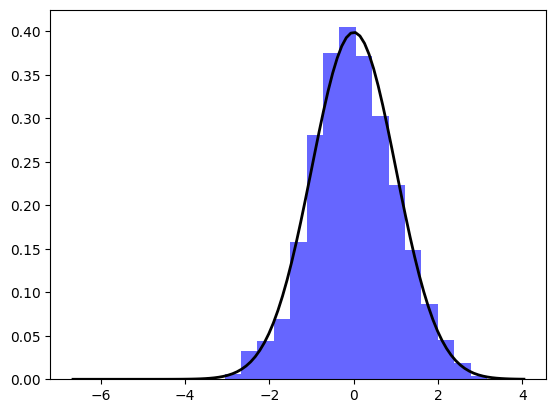

In [27]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

data = interest_data['Z_SCORE_NOTA'].to_numpy()

mu, std = norm.fit(data) 
  
# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
  
plt.show()

## Generate histograms by grade

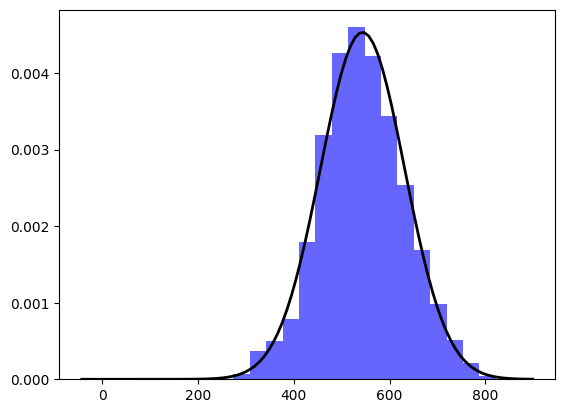

In [28]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

data = interest_data['NU_NOTA_GERAL'].to_numpy()

mu, std = norm.fit(data) 
  
# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
  
plt.show()

## Filter by grades far above or far below average

In [29]:
filtered_interest_data = interest_data.query("Z_SCORE_NOTA > 2.00 or Z_SCORE_NOTA < -2.00")
filtered_interest_data.count()

TP_SEXO                   125412
TP_ESTADO_CIVIL           125412
TP_COR_RACA               125412
TP_FAIXA_ETARIA           125412
TP_ST_CONCLUSAO           125412
TP_ESCOLA                 125412
TP_DEPENDENCIA_ADM_ESC    125412
SG_UF_PROVA               125412
NU_NOTA_CN                125412
NU_NOTA_CH                125412
NU_NOTA_LC                125412
NU_NOTA_MT                125412
NU_NOTA_REDACAO           125412
Q001                      125412
Q002                      125412
Q006                      125412
Q022                      125412
Q024                      125412
Q025                      125412
NU_NOTA_GERAL             125412
Z_SCORE_NOTA              125412
CLASSIFICACAO_NOTA        125412
dtype: int64

In [30]:
analysis_interest_columns = [
    'TP_SEXO',
    'TP_ESTADO_CIVIL',
    'TP_COR_RACA',
    'TP_FAIXA_ETARIA',
    'TP_ST_CONCLUSAO',
    'TP_ESCOLA',
    'TP_DEPENDENCIA_ADM_ESC',
    'SG_UF_PROVA',
    'CLASSIFICACAO_NOTA',
    'Q001',
    'Q002',
    'Q006',
    'Q022',
    'Q024',
    'Q025'
]

analysis_interest_data = filtered_interest_data[analysis_interest_columns]

## Save a CSV file with the analysis interest data

In [31]:
import os  

os.makedirs('analysis_interest_data', exist_ok=True)  
analysis_interest_data.to_csv('analysis_interest_data/analysis-interest-data-2022.csv')

analysis_file_data = pd.read_csv('analysis_interest_data/analysis-interest-data-2022.csv', sep=',', encoding='UTF-8')
analysis_file_data.head()

,Unnamed: 0,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_FAIXA_ETARIA,TP_ST_CONCLUSAO,TP_ESCOLA,TP_DEPENDENCIA_ADM_ESC,SG_UF_PROVA,CLASSIFICACAO_NOTA,Q001,Q002,Q006,Q022,Q024,Q025
0,49,Feminino,Solteiro(a),Preto,Entre 17 e 25 anos,Estou cursando e concluirei o Ensino este ano,Pública,Dependencia administrativa nao informada,Região Nordeste,NOTA: MUITO ABAIXO DA MÉDIA,Pai nunca estudou,Mãe Ensino médio incompleto,Classe Social E,Tem celular,Não tem computador,Tem internet em casa
1,55,Feminino,Solteiro(a),Branco,Entre 17 e 25 anos,Estou cursando e concluirei o Ensino este ano,Pública,Privada,Região Sudeste,NOTA: MUITO ACIMA DA MÉDIA,Pai Ensino médio incompleto,Mãe Graduação completa,Classe Social E,Tem celular,Tem computador,Tem internet em casa
2,94,Masculino,Solteiro(a),Pardo,Entre 26 e 30 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Nordeste,NOTA: MUITO ABAIXO DA MÉDIA,Pai Fundamental I incompleto,Mãe Fundamental I incompleto,Classe Social E,Tem celular,Não tem computador,Tem internet em casa
3,135,Feminino,Solteiro(a),Branco,Entre 17 e 25 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Sudeste,NOTA: MUITO ABAIXO DA MÉDIA,Pai Ensino médio completo,Mãe Ensino médio incompleto,Classe Social E,Tem celular,Não tem computador,Tem internet em casa
4,136,Feminino,Solteiro(a),Pardo,Entre 17 e 25 anos,Estou cursando e concluirei o Ensino este ano,Pública,Dependencia administrativa nao informada,Região Nordeste,NOTA: MUITO ABAIXO DA MÉDIA,Pai Fundamental II incompleto,Mãe Ensino médio completo,Classe Social E,Tem celular,Não tem computador,Tem internet em casa


## Convert table to transactions

In [32]:
transactions = analysis_interest_data.to_numpy()
transactions

array([['Feminino', 'Solteiro(a)', 'Preto', ..., 'Tem celular',
        'Não tem computador', 'Tem internet em casa'],
       ['Feminino', 'Solteiro(a)', 'Branco', ..., 'Tem celular',
        'Tem computador', 'Tem internet em casa'],
       ['Masculino', 'Solteiro(a)', 'Pardo', ..., 'Tem celular',
        'Não tem computador', 'Tem internet em casa'],
       ...,
       ['Masculino', 'Solteiro(a)', 'Branco', ..., 'Tem celular',
        'Não tem computador', 'Tem internet em casa'],
       ['Masculino', 'Solteiro(a)', 'Pardo', ..., 'Tem celular',
        'Tem computador', 'Tem internet em casa'],
       ['Masculino', 'Solteiro(a)', 'Preto', ..., 'Não tem celular',
        'Não tem computador', 'Tem internet em casa']], dtype=object)

## Create apriori rules

In [33]:
%run '../scripts/apriori-params-setup.py'
rules = apriori(transactions, min_support=support, min_confidence=confidence)
rules

<generator object apriori at 0x2cfedceb0>

## Run apriori

In [34]:
from datetime import datetime

initial_time = datetime.now()

results = pd.DataFrame(list(rules))

execution_time = datetime.now() - initial_time
print("Time to run apriori: " + str(execution_time))

Time to run apriori: 0:59:32.399539


In [35]:
results

,items,support,ordered_statistics
0,(Classe Social E),0.571421,"[((), (Classe Social E), 0.571420597709948, 1.0)]"
1,(Dependencia administrativa nao informada),0.680995,"[((), (Dependencia administrativa nao informad..."
2,(Entre 17 e 25 anos),0.845940,"[((), (Entre 17 e 25 anos), 0.845939782476956,..."
3,(Feminino),0.565831,"[((), (Feminino), 0.5658310209549325, 1.0)]"
4,(NOTA: MUITO ABAIXO DA MÉDIA),0.513101,"[((), (NOTA: MUITO ABAIXO DA MÉDIA), 0.5131008..."
...,...,...,...
10061,"(Branco, Entre 17 e 25 anos, Tem internet em c...",0.111337,"[((Branco, Feminino, Já concluí o Ensino Médio..."
10062,"(Entre 17 e 25 anos, Tem internet em casa, NOT...",0.152226,"[((Feminino, Já concluí o Ensino Médio), (Entr..."
10063,"(Entre 17 e 25 anos, Tem internet em casa, NOT...",0.110603,"[((Masculino, Já concluí o Ensino Médio), (Ent..."
10064,"(Entre 17 e 25 anos, Tem internet em casa, NOT...",0.120491,"[((Região Sudeste, Dependencia administrativa ..."


## Extract results to a new table

In [36]:
from datetime import datetime

initial_time = datetime.now()

%run '../scripts/extractor.py'

organized_rules = extractor(results)

execution_time = datetime.now() - initial_time
print("Time to run extractor: " + str(execution_time))

organized_rules

Time to run extractor: 0:00:03.415709


In [37]:
rules_count = len(organized_rules.index)
print("Count of itemsets: " + str(len(results.index)))
print("Count of association rules for support " + str((support *100)) + "% and confidence " + str((confidence * 100)) + "%: " + str(rules_count))

Count of itemsets: 10066
Count of association rules for support 10.0% and confidence 50.0%: 272535


## Save results to a new CSV file

In [38]:
import os  

os.makedirs('results', exist_ok=True)  
organized_rules.to_csv('results/organized-associations-2022.csv')  